<a href="https://colab.research.google.com/github/kecitclub/moyeMoye/blob/main/bgimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: make a function that passes in the prompt and returns the image generated from freepik

import requests
import json
import base64
from PIL import Image
import io
from IPython.display import display

def generate_freepik_image(prompt):
    # payload = {
    #     "prompt": prompt,
    #     "styling": {
    #         "style": "photo",
    #     }
    # }




    url = "https://api.freepik.com/v1/ai/text-to-image"

    payload = {

        "prompt": prompt,
        "styling": {
            "framing": "first-person",
            "style": "photo"
        },
        "guidance_scale": 1.5,
        "image": {"size": "square_1_1"}
    }

    headers = {
        "x-freepik-api-key": "FPSX7a908e9ab5b64cfa820b29f2c18773a0", # Replace with your actual API key
        "Content-Type": "application/json"
    }

    try:
        response = requests.request("POST", url, json=payload, headers=headers)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        response_json = response.json()

        image_data = response_json['data'][0]['base64']
        if image_data:
            image_bytes = base64.b64decode(image_data)
            image = Image.open(io.BytesIO(image_bytes))

            return image
        else:
            print("No image data found in the API response.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error during API request: {e}")
        return None
    except (KeyError, IndexError) as e:
        print(f"Error parsing API response: {e}")
        print(response.text) # Print the response for debugging
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
!pip install groq

In [71]:
from groq import Groq
def chat(prompt):
  client = Groq(api_key="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")
  completion = client.chat.completions.create(
      model="llama-3.3-70b-versatile",
      messages=[{
          "role":"user",
          "content":[
              {"type": "text", "text": prompt}
          ]
      }],
      temperature=2,
      max_tokens=1024,
  )
  return completion.choices[0].message.content


In [51]:
def create_image_prompt(vibe, product):
    """
    Generates a prompt for an image generator based on the provided vibe and product.
    The function ensures the image background matches the vibe and aesthetic associated
    with the product, but the product itself is not depicted in the image. The image
    includes empty space in the lower half and is viewed from a natural human height.

    Parameters:
    vibe (str): The desired ambiance or feeling of the image.
    product (str): The product around which the aesthetic is centered.

    Returns:
    str: A detailed prompt describing the desired image background without mentioning the product.
    """

    # Sample description based on the vibe and product
    # description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
    #               "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
    #               "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
    #               "viewed from a straight-ahead perspective at natural human height. Return only the prompt as your response is sent to the image generator directly"


    description = f"Create and return a prompt to generate an image that embodies the vibe of '{vibe}' with an aesthetic that could be associated with '{product}'. "\
                  "The background should reflect this ambiance, including elements like colors, textures, and relevant objects or scenery "\
                  "that suggest the vibe without showing the product itself. The image should be composed with empty space in the lower half, "\
                  "viewed from a straight-ahead perspective at natural human height. Return only the answer that you would reply. Donot include any background references and product details. Just to the point answer."

    return description


In [92]:
# Example usage
prompt = chat(create_image_prompt('tech', 'web development course'))

In [82]:
prompt

'Create an image of a vibrant backdrop with warm oranges, deep blues, and soft yellows, featuring elements like sacred waters, terracotta tiles, lanterns, and auspicious marigold garlands, filling the top half of the frame, viewed directly from natural human height with empty space in the lower half, capturing the serenity and Joy of a festival Morning.'

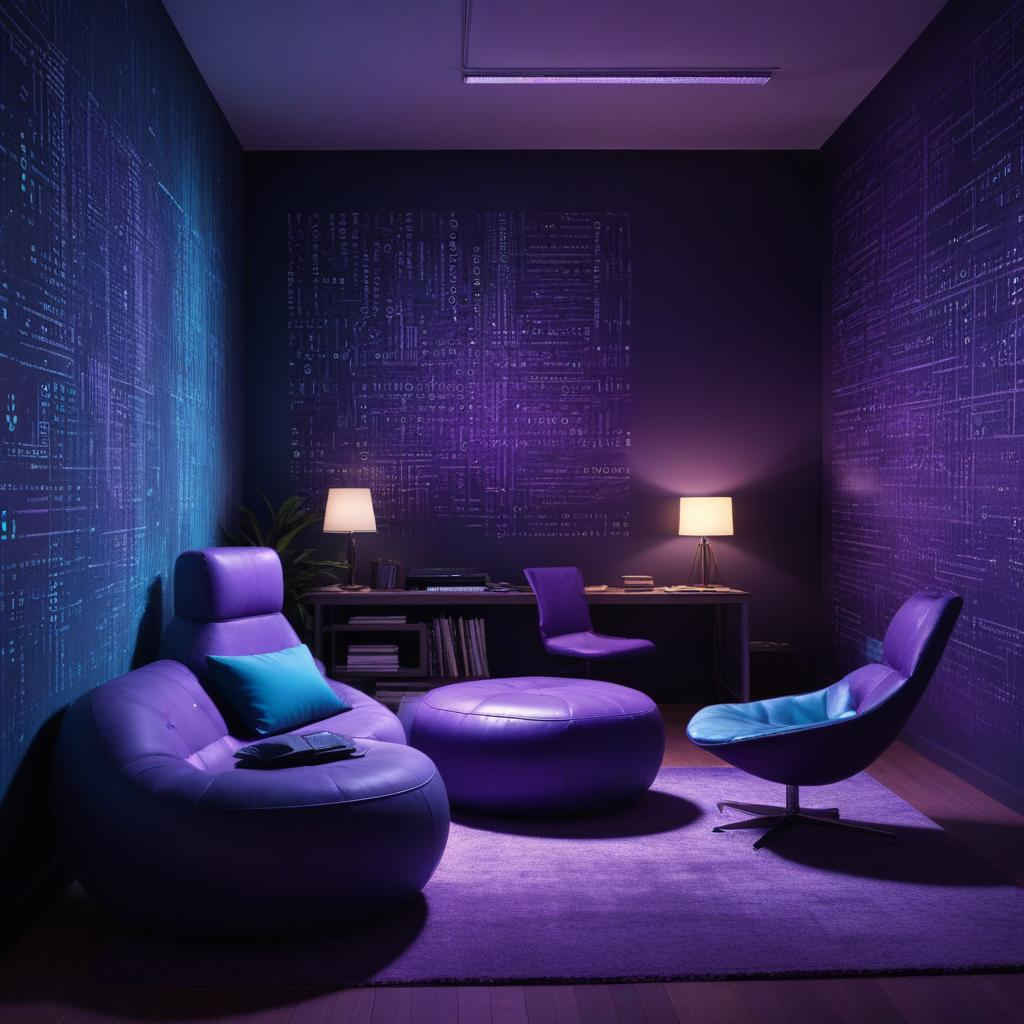

In [93]:
image = generate_freepik_image(prompt)
display(image)

In [75]:
import os

if image:
    # Generate a unique filename
    import uuid
    unique_filename = str(uuid.uuid4()) + ".png"  # Use UUID for uniqueness
    filepath = os.path.join("/content", unique_filename) # Save in /content directory

    # Save the image with the unique filename
    image.save(filepath)
    print(f"Image saved as: {unique_filename}")

    # Download the image
    from google.colab import files
    files.download(filepath)

Image saved as: 8b39f362-b1a4-4695-92ac-f51c38cb3f7c.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>